
# Author: Utkarsh Thakur

## Task 3 Exploratory Data Analysis


## Graduate Rotational Internship Program @ THE SPARK FOUNDATIONS

### Deriving Business insights from the given data by exploratory data analysis


## Technical Reqirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
# loading the provided dataset
#retail dataset

df= pd.read_csv(r"Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
# checking Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.duplicated().sum()

17

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df.drop_duplicates(subset=None , keep='first', inplace=True)
df.duplicated().sum()

0

# Visualisiing the Dataset¶

<AxesSubplot:>

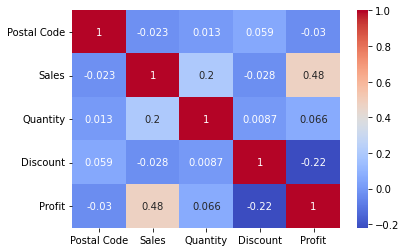

In [11]:
cor=df.corr()
sns.heatmap(cor, annot=True,cmap='coolwarm')

In [12]:
df=df.drop(['Postal Code'],axis=1)

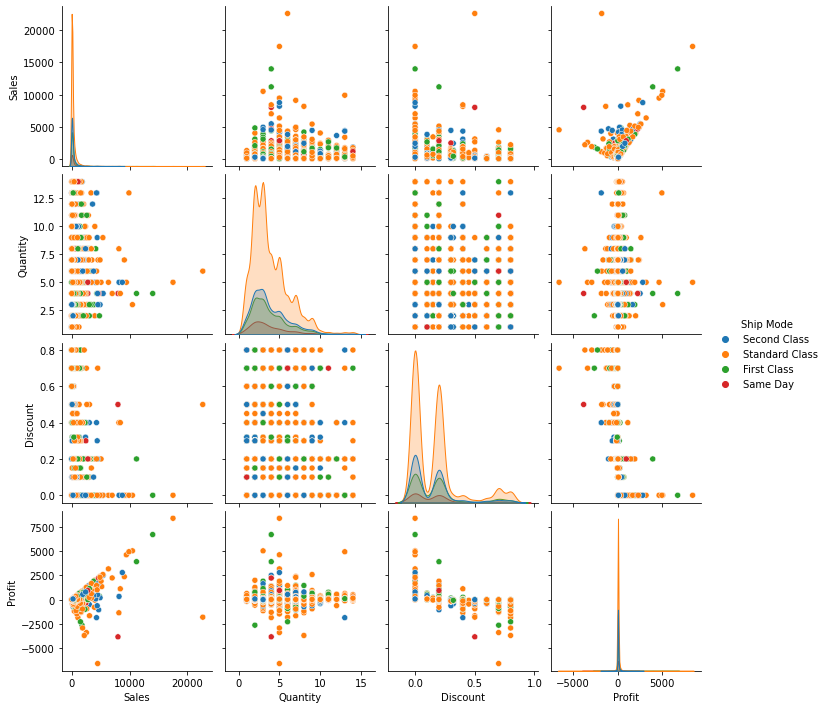

In [13]:
sns.pairplot(df, hue='Ship Mode')

In [14]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

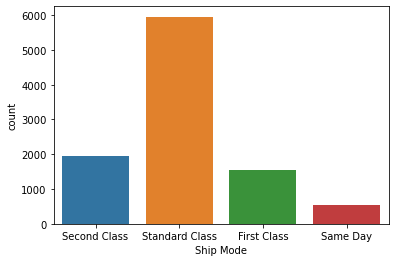

In [15]:
sns.countplot(x=df['Ship Mode'])

In [16]:
df.Segment.value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

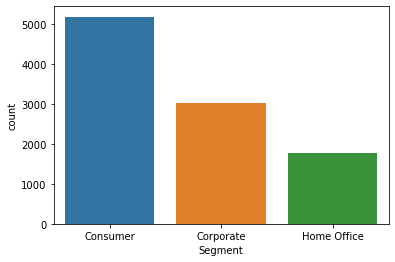

In [17]:
sns.countplot(x=df['Segment'])

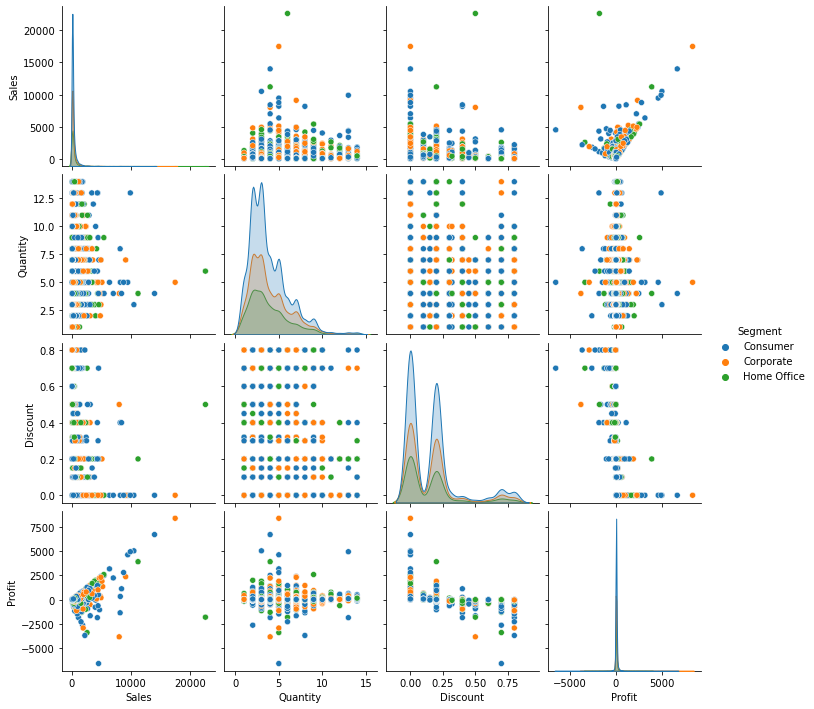

In [18]:
sns.pairplot(df,hue='Segment')

In [21]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

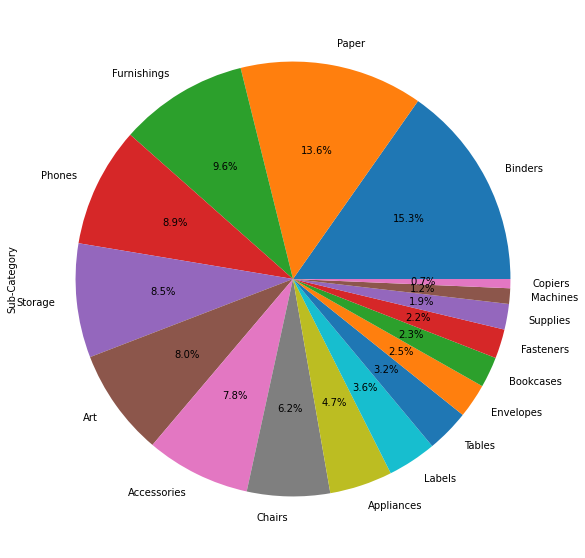

In [33]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Observations

Maximum Values :- 
      Binders
      Paper
      Furnishings
      Phones
      Storage
      Art
      Accessories

Minimum values :- 
      Copiers
      Machines
      Suppliers 

In [34]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

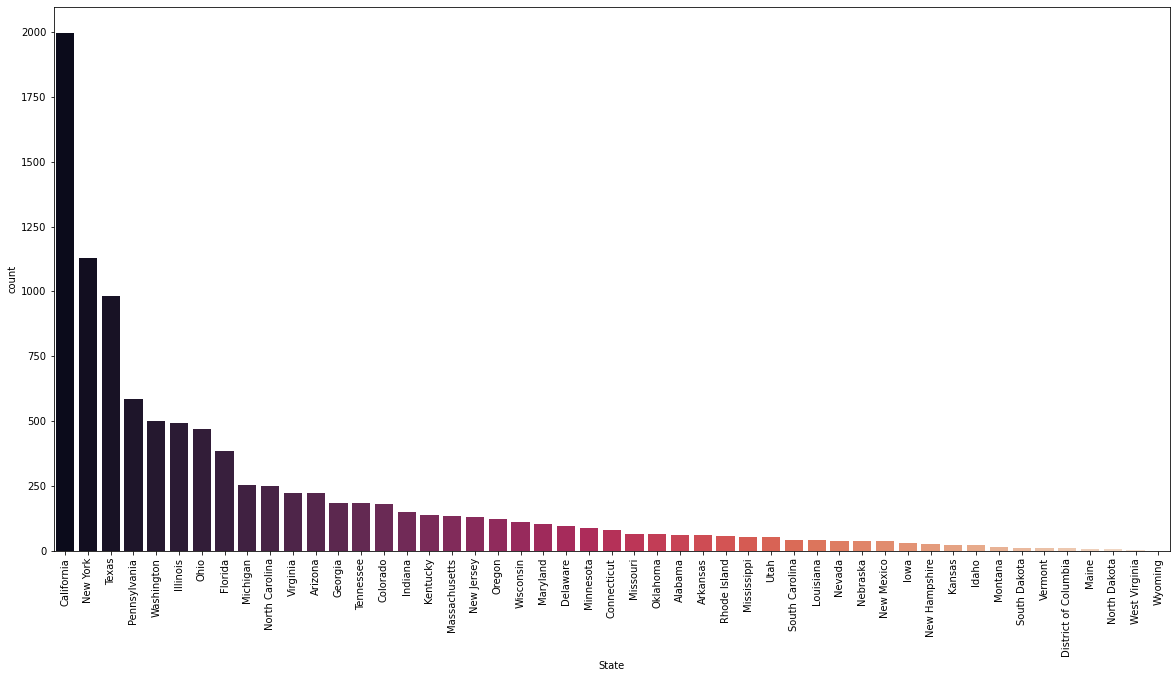

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x='State',data=df,palette='rocket',order=df.State.value_counts().index)
plt.xticks(rotation=90)
plt.show()

Highest number of students are from California and New York

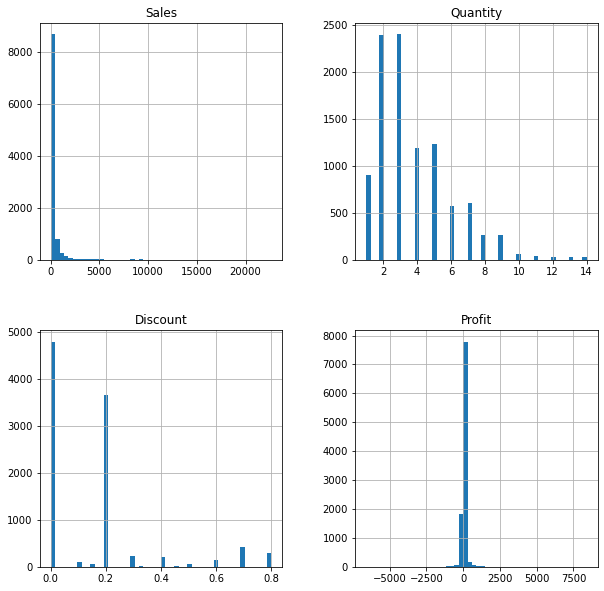

In [41]:
df.hist(figsize=(10,10),bins=50)
plt.show()

Most selling quantities are 2,3

Maximum discount given is 20%

Maximum Profits are only marginal

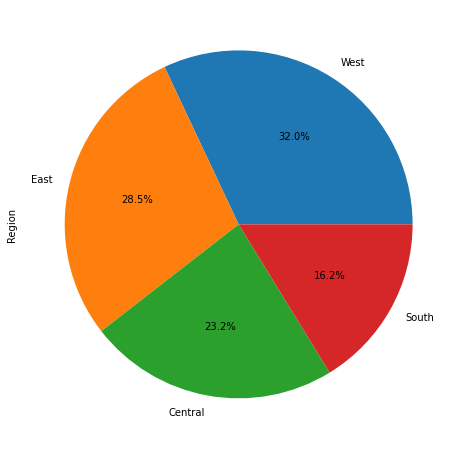

In [43]:
df['Region'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()

## Profit vs Discount

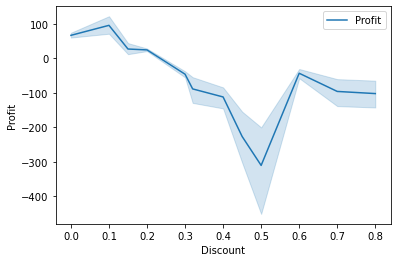

In [44]:
sns.lineplot(x='Discount', y='Profit', label='Profit',data=df)
plt.legend()
plt.show()

There is no correlation between profit and discount

## Profit vs Sales

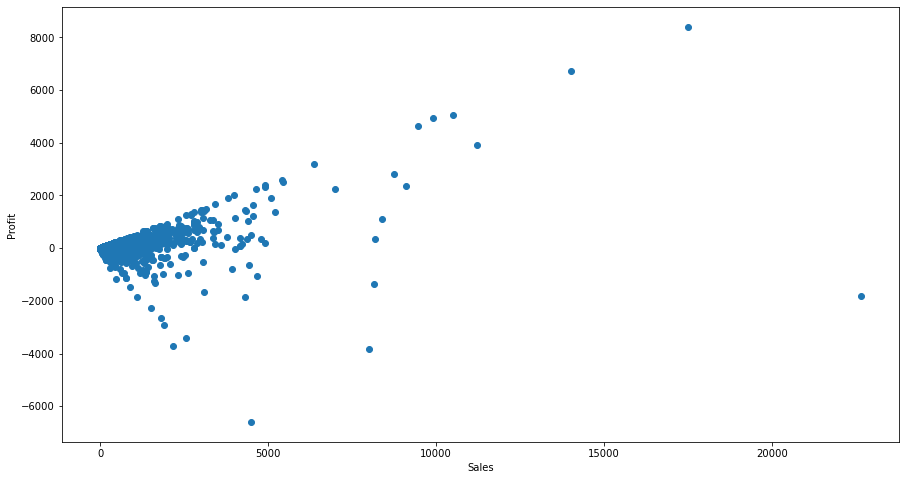

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()


### Segment(Profit vs Sales)¶

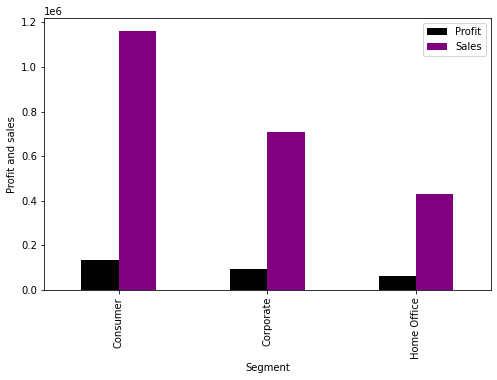

In [46]:
df.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color=['black','purple'],figsize=(8,5))
plt.ylabel('Profit and sales')
plt.show()

#### Maximum in consumer segment
#### Minimum in Home Office

## Profit vs Quantity

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

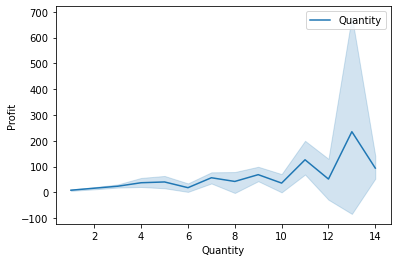

In [47]:
sns.lineplot(x='Quantity', y='Profit', label='Quantity', data=df)

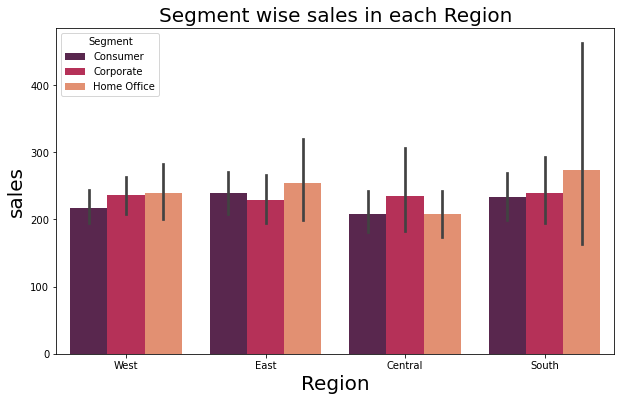

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region',y='Sales',data=df,hue='Segment', order=df['Region'].value_counts().index, palette='rocket')
plt.title('Segment wise sales in each Region',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.xlabel('Region',fontsize=20)
plt.show()


Segment wise sale per Region is nearly same

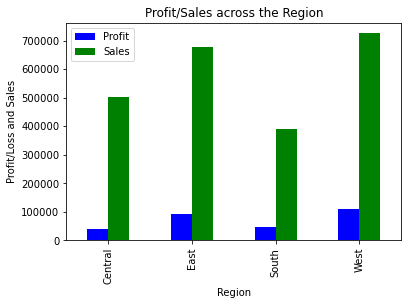

In [49]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','green'])
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/Sales across the Region')
plt.show()

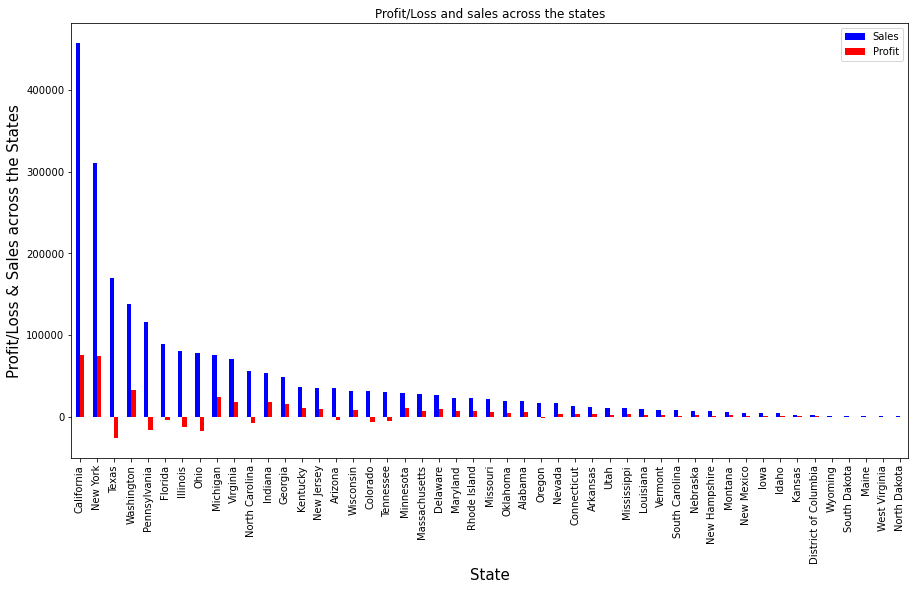

In [50]:
vs=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
vs[:].plot.bar(color=['blue','red'],figsize=(15,8))
plt.xlabel('State',fontsize=15)
plt.ylabel('Profit/Loss & Sales across the States', fontsize=15)
plt.title('Profit/Loss and sales across the states')
plt.show()

Highest profit in California and New York     
Less profit in Ohio, Pennsylvania and Texas

In [51]:
df['State'].value_counts().nlargest(10)


California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

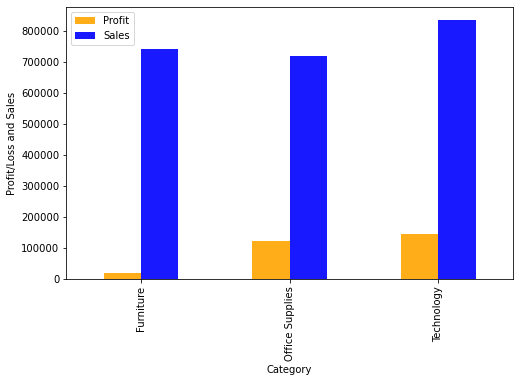

In [52]:
df.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color=['orange','blue'], alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()



## Finding the weak areas to rectify

High profit in technology and office supplies

Less profit in furnitures

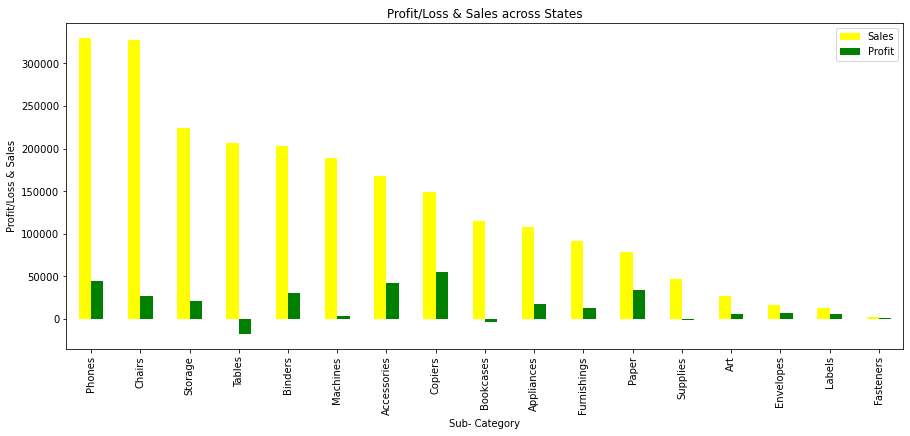

In [53]:
ps=df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
ps[:].plot.bar(color=['yellow','green'],figsize=(15,6))
plt.title('Profit/Loss & Sales across States')
plt.xlabel('Sub- Category')
plt.ylabel('Profit/Loss & Sales')
plt.show()


High Sales= Phones and Sub- Category

High Sales = Chair(Less Profit)

High Loss = Tables, bookmark and sub-category

# Conclusion
The data exploratory task was carried out successfully to find the weak areas in given retail dataset to make more profit out of the same.